<a href="https://colab.research.google.com/github/jasmineA20/MathModeling/blob/main/HW%239.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
uploaded = files.upload()

Saving HW9_Data.txt to HW9_Data.txt


In [10]:
df = pd.read_csv('HW9_Data.txt', sep=' ')
df

,Year,Observed_population,Predicted_population,Percent_error
0,1790,3929000,3929000,0.0
1,1800,5308000,5336000,0.5
2,1810,7240000,7227000,-0.2
3,1820,9638000,9756000,1.2
4,1830,12866000,13108000,1.9
5,1840,17069000,17505000,2.6
6,1850,23192000,23191000,-0.0
7,1860,31443000,30410000,-3.3
8,1870,38558000,39370000,2.1
9,1880,50156000,50175000,0.0


Text(0.5, 1.0, 'US Population vs. Year')

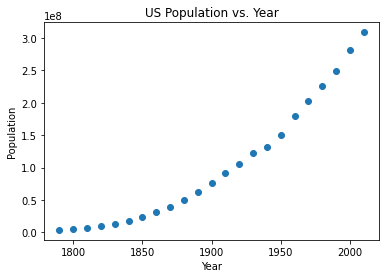

In [11]:
plt.plot(df['Year'], df['Observed_population'],'o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('US Population vs. Year')

Splitting the data into training (1790-1950) and test(1960-2010) segments

In [12]:
train, test = df[0:17], df[17:]

For this model, we first need to pick a value for M. I will estimate M to be 2.5 times the population value during 1950, which is calculated below to be 376,742,500.

In [14]:
M = train['Observed_population'][16]*2.5 
M

376742500.0

From this value for M, we will estimate r and t*. We will then use least squares regression to estimate r and t* based on the following equation, Equation 11.10 in the textbook:
(we can drop the absolute value since we assume population will always be positive and we also assume that it always holds that M > P)

In [24]:
X_train, y_train =  train['Year'], np.log(train['Observed_population'] 
                                          / (M-train['Observed_population']))

In [26]:
A = np.vstack([X_train, np.ones(len(X_train))]).T
model = np.linalg.lstsq(A, y_train)
resid = model[1]
rM, C = model[0] #r is slope, C is intercept
r = rM / M 
r, C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(7.020586663972419e-11, -51.73924589210726)

These parameters fit the data fairly well.

Text(0.5, 1.0, 'ln(P / (M-P)) vs. r*M*Year')

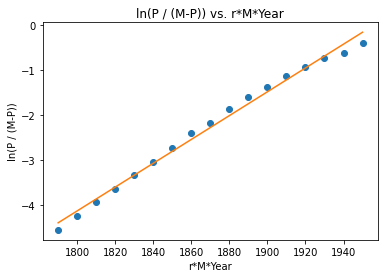

In [28]:
plt.plot(X_train, y_train, 'o') 
plt.plot(X_train, rM*X_train+C)
plt.xlabel('r*M*Year')
plt.ylabel('ln(P / (M-P))')
plt.title('ln(P / (M-P)) vs. r*M*Year')

We can also calculate $t^*$ using the equation (pg 466) $t^* = t_0 - \frac{1}{rM}ln(\frac{P_0}{M-P_0})$

In [29]:
t_star = X_train[0] - (1/(r*M))*np.log(train['Observed_population'][0]/
                                       (M-train['Observed_population'][0]))
t_star

1962.1275468788856

Now, we plug in our values of M = 376742500, r = 7.020586663972426e-11, and t* = 1973.3193852952581 into Equation 11.12: 
$ P(t) = \frac{M}{1+e^{rM(t-t^*)}}$

In [30]:
Pt = M/(1+np.exp(-r*M*(df['Year']-t_star)))

Here, we plot the predicted data and the real data to visually assess how good the model is, it appears to be pretty good.

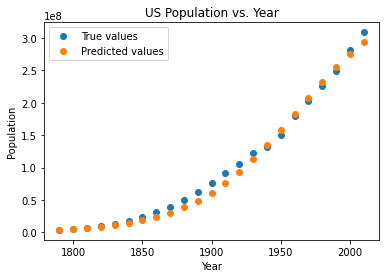

In [31]:
plt.plot(df['Year'], df['Observed_population'],'o')
plt.plot(df['Year'], Pt,'o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('US Population vs. Year')
plt.legend(['True values', 'Predicted values'])

Now, we calculate the RMSE and graph the test data (1960-2010). The test data fits very well.

In [36]:
RMSE = np.sqrt(np.sum((test['Observed_population']-Pt[17:])**2)/len(Pt[17:]))
RMSE


7742431.0401316965

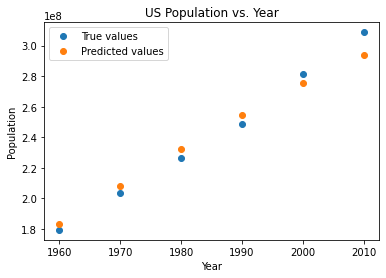

In [37]:
plt.plot(test['Year'], test['Observed_population'],'o')
plt.plot(test['Year'], Pt[17:],'o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('US Population vs. Year')

plt.legend(['True values', 'Predicted values'])

Section 11.1 #6 \\
(a) Two major assumptions: \\
We assume there are no births, deaths, arrivals, or departures (that N is constant)
We assume everyone is susceptible to the virus, there is no immunity
Our assumptions may not be reasonable since a disease may cause death, which affects N. The susceptibility assumption may be reasonable. However, in order for the model to work, we need both assumptions.
 
(b) Graph of  dX/dt
  vs. X \\
To graph the general trend of the desired plot, we have X be integers ranging from 0 to 99, we let N = 100, and we let k = .001.
In [50]:


In [38]:
X = np.arange(100)
N = 100 
k = .001 

dXdt = k*X*(N-X)

Text(0, 0.5, '$\\frac{dX}{dt}$')

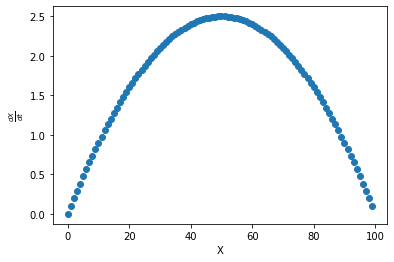

In [39]:
plt.plot(X, dXdt,'o')
plt.xlabel('X')
plt.ylabel(r'$\frac{dX}{dt}$')

(c) X vs. t
if  $X_1<N/2$
 

In [41]:
X1 =  1

vals = np.zeros([100,1])

vals[0] = X1

for i in range(1,100): 
    change = k*vals[i-1]*(N-vals[i-1])
    vals[i] = vals[i-1] + change

Text(0, 0.5, 'X')

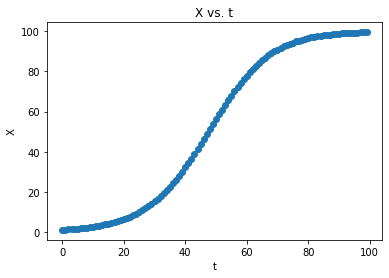

In [42]:
plt.plot(X, vals,'o')

plt.title('X vs. t')
plt.xlabel('t')
plt.ylabel('X')

if  $X_2>N/2$

In [43]:
X2 = N/2 + 1

vals2 = np.zeros([100,1])

vals2[0] = X2

for i in range(1,100): 
    change = k*vals2[i-1]*(N-vals2[i-1])
    vals2[i] = vals2[i-1] + change

Text(0, 0.5, 'X')

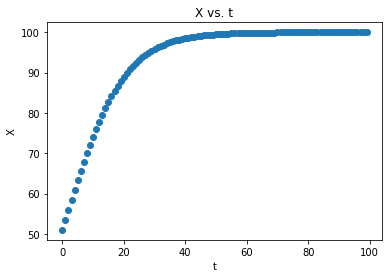

In [44]:
plt.plot(X, vals2,'o')

plt.title('X vs. t')
plt.xlabel('t')
plt.ylabel('X')

(d) Solving this model
Solving the model gives us Equation 11.12 from the book:
$X(t)= \frac{N}{1+e^{−kN(t−t_*)}}$
 
where
$t_*=t_0−\frac{1}{kN}ln\frac{X_0}{N−X_0}$
 
 
(e) limit of X as t -> infinity
As  t→∞
 , X(t) becomes
X(∞)=$\frac{N}{1+e^{−∞}}=\frac{N}{1+0}=N$
 


(f)Working with data

In [46]:
N = 5000
t = np.array([2,6,10])
X = np.array([1887, 4087, 4853]) 
lnX_N_X = np.array([-.5, 1.5, 3.5])

In [48]:
A = np.vstack([t, np.ones(len(t))]).T
model = np.linalg.lstsq(A, lnX_N_X)
resid = model[1]
kN, C = model[0] #r is slope, C is intercept
k = kN / N 
k, C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(0.00010000000000000002, -1.5000000000000007)

In [49]:
t_star = t[0] - (1/(k*N))*np.log(X[0]/(N-X[0])) 
t_star

3.0011972501461157

In [50]:
Xt = N/(1+np.exp(-k*N*(t-t_star)))

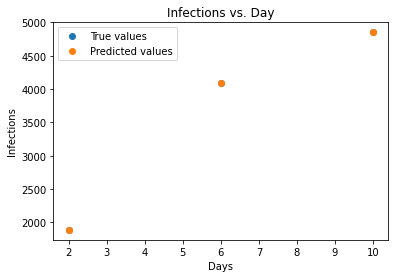

In [51]:
plt.plot(t, X,'o')
plt.plot(t, Xt,'o')
plt.xlabel('Days')
plt.ylabel('Infections')
plt.title('Infections vs. Day')
plt.legend(['True values', 'Predicted values'])

In [52]:
 X, Xt

(array([1887, 4087, 4853]),
 array([1887.        , 4087.42588207, 4853.35365878]))

Since the true values are almost exactly equal to the predicted values,the data does support the model.


(g) Estimations for k, $t^*$, and X(12)

In [53]:
k, t_star

(0.00010000000000000002, 3.0011972501461157)

In [54]:
X12 = N/(1+np.exp(-k*N*(12-t_star))) 
X12 #All infected by day 12

4945.032753336486